In [1]:
import os
import json
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
MODEL_DIR = "../src/sklearn_models/minibatch_kmeans"
SCALER_FILE = os.path.join(MODEL_DIR, "scaler.joblib")
PCA_FILE = os.path.join(MODEL_DIR, "incremental_pca.joblib")
KMEANS_FILE = os.path.join(MODEL_DIR, "minibatch_kmeans.joblib")
METADATA_FILE = os.path.join(MODEL_DIR, "metadata.json")

# Meta-data

In [5]:
with open(METADATA_FILE, "r") as f:
    metadata = json.load(f)

print("Model metadata:")
print(json.dumps(metadata, indent=4))

Model metadata:
{
    "vector_collection_name": "texts_collection",
    "num_vectors_processed": 2102529,
    "batch_size": 50000,
    "n_clusters": 10,
    "use_pca": true,
    "pca_components": 128,
    "model_files": {
        "scaler": "src/sklearn_models/minibatch_kmeans/scaler.joblib",
        "pca": "src/sklearn_models/minibatch_kmeans/incremental_pca.joblib",
        "kmeans": "src/sklearn_models/minibatch_kmeans/minibatch_kmeans.joblib"
    },
    "training_time_seconds": 197.48,
    "timestamp": "2025-10-03 21:26:14"
}


# Loading Models

In [6]:
scaler = joblib.load(SCALER_FILE)
print("Scaler loaded.")
if metadata.get("use_pca"):
    pca = joblib.load(PCA_FILE)
    print("PCA loaded.")
else:
    pca = None
kmeans = joblib.load(KMEANS_FILE)
print("MiniBatchKMeans model loaded.")

Scaler loaded.
PCA loaded.
MiniBatchKMeans model loaded.


# Model-analysis

In [7]:
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")

Number of clusters: 10
Cluster centers shape: (10, 128)


In [11]:
print("First 3 cluster centers (truncated):")
print(kmeans.cluster_centers_[:3])

First 3 cluster centers (truncated):
[[-3.35600455e+00 -2.56144697e+00 -1.89080344e+00 -1.58784151e+00
   1.34847534e+00 -2.84969405e-01  1.72911101e-01 -6.17722106e-01
  -1.85992531e+00  1.01689215e-01 -8.58065199e-01 -1.79180283e+00
  -1.20918594e+00  8.90174138e-01 -1.30184741e-01 -4.21045299e-01
   8.63592627e-02  4.75907745e-01 -7.98981321e-01 -4.23219103e-01
   3.85246097e-01  1.61400513e-01  7.63452296e-02 -3.45291064e-01
  -1.77962178e-01  3.43133638e-01  6.36682254e-01  5.66051791e-01
  -2.76628546e-01 -2.18077264e-02  7.06199143e-01 -6.29576952e-02
  -2.48442164e-01 -2.19419908e-01 -3.54535777e-01 -2.63009366e-01
   1.26606438e-01  7.36276454e-02  2.78499944e-02  6.10473089e-02
  -2.75024944e-01  4.12309843e-02 -2.85069424e-01  4.96983886e-02
   3.96720581e-04  2.59039228e-02 -2.19623889e-01  2.87677923e-04
   2.81779236e-01 -1.44452809e-01  5.34201142e-02  2.28283582e-01
   9.18257995e-02 -4.01347329e-02  2.13936568e-01 -3.47194420e-02
  -1.41892632e-01  6.29888560e-02 -9.77

## Visualization

Model inertia: 686953.7477913975


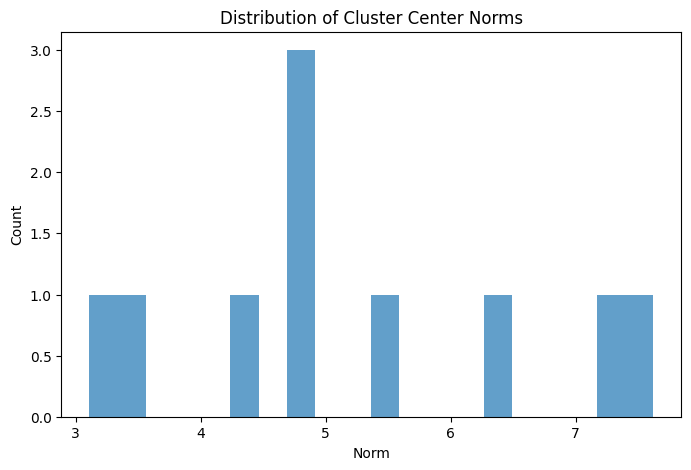

PCA components shape: (128, 384)
Explained variance ratio (first 10 components): [0.02474149 0.02182996 0.01718807 0.01565697 0.01493198 0.01408697
 0.01290736 0.01251217 0.01212728 0.01159334]


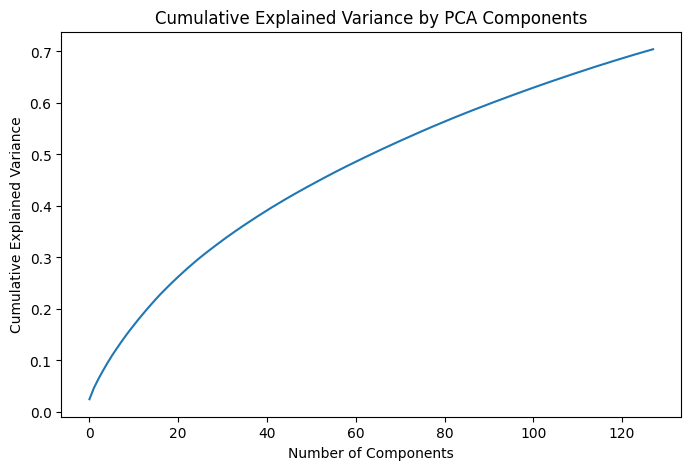

In [12]:
if hasattr(kmeans, "inertia_"):
    print(f"Model inertia: {kmeans.inertia_}")

center_norms = np.linalg.norm(kmeans.cluster_centers_, axis=1)
plt.figure(figsize=(8, 5))
plt.hist(center_norms, bins=20, alpha=0.7)
plt.title("Distribution of Cluster Center Norms")
plt.xlabel("Norm")
plt.ylabel("Count")
plt.show()

if pca is not None:
    print(f"PCA components shape: {pca.components_.shape}")
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Explained variance ratio (first 10 components): {explained_variance_ratio[:10]}")

    plt.figure(figsize=(8, 5))
    plt.plot(np.cumsum(explained_variance_ratio))
    plt.title("Cumulative Explained Variance by PCA Components")
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.show()
